## Salary Prediction Dataset 

Questo progetto si prepone di risolvere il problema della __Salary Prediction__ in versione *Classification*, quindi di raggruppare i record in due classi:
- _Salary <= 50k_ Per le persone il cui slario è predetto inferiore a 50k
- _Salary > 50k_ Per l'inverso;

Iniziamo aprendo il dataset dal folder apposito e leggendolo con _pandas_

In [1]:
import pandas as pd
import os

os.chdir("dataset")
df = pd.read_csv("salary.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data Exploration
Cominciamo vedendo in che stato versa il Dataset cosicchè si possa capire che tipo di operazioni vanno svolte 

In [2]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Si può notare che tra i tipi delle colonne ci sono principalmente valori _object_, sicuramente servirà un'operazione di *encoding*

In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Strane queste colonne capital-gain e capital-loss, meglio dare un'occhiata più specifica

In [5]:
df['capital-gain'].value_counts()

capital-gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
6097         1
1639         1
7978         1
2387         1
5060         1
Name: count, Length: 119, dtype: int64

In [6]:
df['capital-gain'].value_counts()

capital-gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
6097         1
1639         1
7978         1
2387         1
5060         1
Name: count, Length: 119, dtype: int64

Capital-gain e capital-value essere inutili, precisamente, (facendo i conti una sola volta perché il numero di 0 nelle due colonne è lo stesso) si può dire che su 32561 tuple 29849 sono 0.
Infatti impostando la semplice proporzione 
$$
\frac{29849}{32561} \cdot 100 \approx 91.6\%
$$  
Capiamo che addirittura il _*91.6%*_ dei valori all'interno di queste due colonne è 0, questo è abbastanza per rimuovere entrambe le colonne per rendere il dataset più semplice.


Per capire più facilmente quanti siano gli zeri a confronto dei valori accettabili ecco anche una rappresentazione grafica, ma prima un leggero setup di _MathPlotLib_ per avere dei grafici più carini

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.rcParams.update({
    'figure.facecolor': '#1d2021',
    'axes.facecolor': '#201d16',
    'axes.edgecolor': '#ebdbb2',
    'axes.labelcolor': '#ebdbb2',
    'xtick.color': '#ebdbb2',
    'ytick.color': '#ebdbb2',
    'text.color': '#ebdbb2',
    'axes.titlecolor': '#ebdbb2',
    'grid.color': '#3c3836',
})

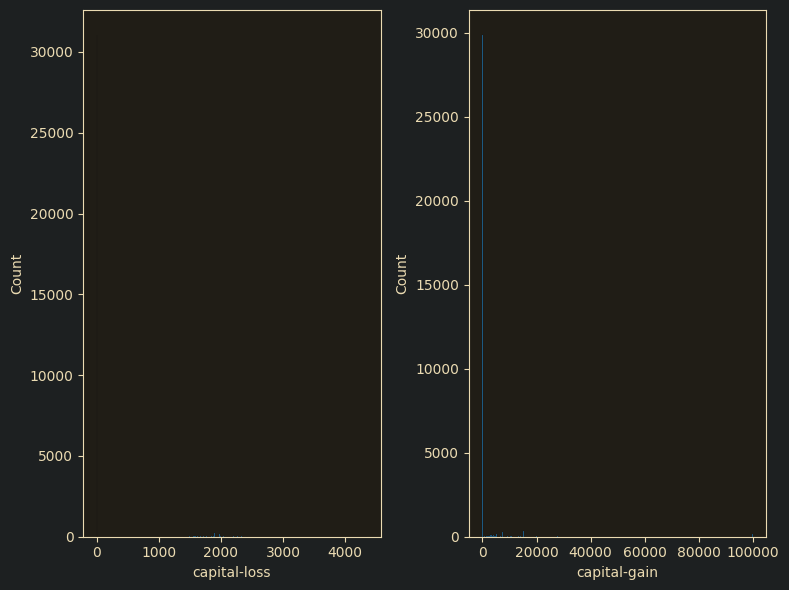

In [8]:
plt.figure(figsize=(8, 6)) 
plt.subplot(1, 2, 1)
sns.histplot(df["capital-loss"])

plt.subplot(1, 2, 2)
sns.histplot(df["capital-gain"], kde=False)

plt.tight_layout()
plt.show()

In [9]:
df.isnull().all()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool

In [10]:
for col in df.columns:
    print(f"\nColonna: {col}")
    print(df[col].value_counts())


Colonna: age
age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

Colonna: workclass
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Colonna: fnlwgt
fnlwgt
164190    13
203488    13
123011    13
113364    12
121124    12
          ..
35224      1
30602      1
317681     1
87263      1
151991     1
Name: count, Length: 21648, dtype: int64

Colonna: education
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           33

Tramite l'output di questi ultimi metodi è possibile accorgersi che non sono presenti valori _null_, ma sono presenti molti _missing values_ marchiati con il carattere _?_ nelle colonne:
- WorkClass
- Occupation
- Native Coutry

Inoltre, si può osservare che la colonna _education_ non si differenzia sostanzialmente da _education-num_, se non per il fatto che quest'ultima contiene valori numerici. Considerando che durante il preprocessing andremo ad applicare tecniche di _encoding_ sulle colonne con valori non numerici, è più conveniente mantenere _education-num_. Quest'ultima, infatti, rappresenta già un'ordinamento naturale dei livelli di istruzione, che andrebbe perso utilizzando algoritmi di encoding come il *One Hot Encoding*.

Infine anche la colonna fnlwgt (Final Weight) è inutile perché rappresenta un peso usato nell'analisi demografica dei sondaggi che, nel contesto della classificazione è completamente inutile. 

Ora guardiamo un boxplot delle colonne numeriche, facciamoci un'idea degli _outlier_

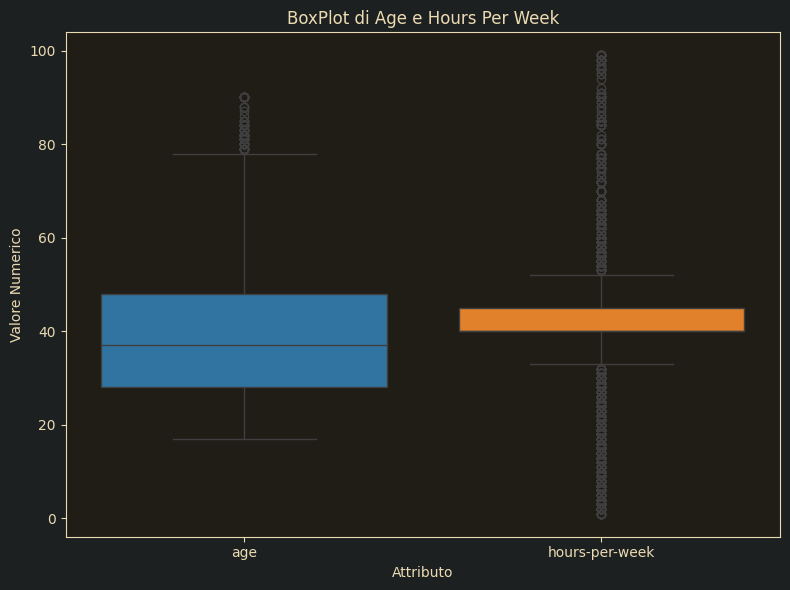

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(df[["age","hours-per-week"]])
plt.title("BoxPlot di Age e Hours Per Week")
plt.ylabel("Valore Numerico")
plt.xlabel("Attributo")
plt.tight_layout()
plt.show()

Ci sono dei valori lontani, ma non irrelistici quindi _non serve pulire gli outlier_ 

Infine vediamo qualche grafico per farci un'idea della distribuzione del _dataset_

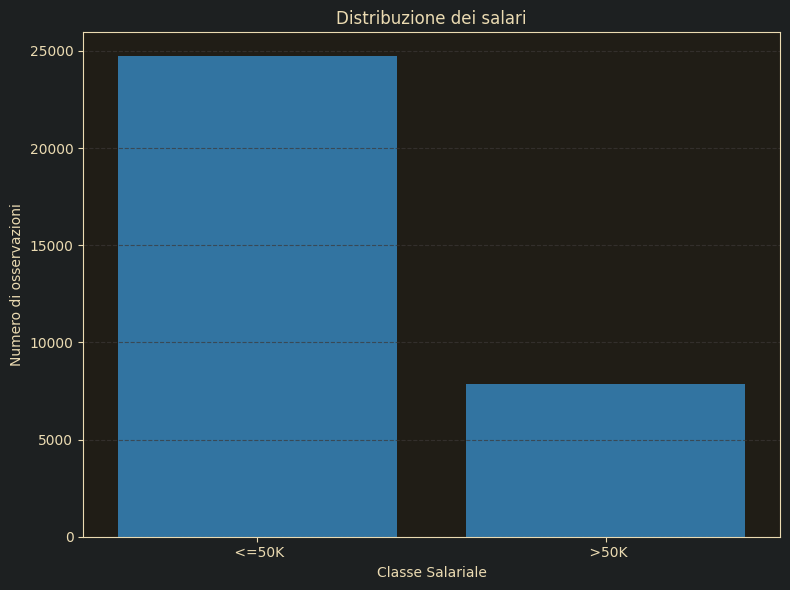

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="salary")

plt.title("Distribuzione dei salari")
plt.xlabel("Classe Salariale")
plt.ylabel("Numero di osservazioni")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Da qui si può notare un grande _class imbalance_

## Preprocessing
Cominciamo dalla rimozione delle colonne che erano risultate inutili dalla Data Exploration

In [13]:
df.drop(["capital-gain", "capital-loss","education","fnlwgt"], axis=1, inplace=True)

Continuando procediamo alla rimozione dei duplicati

In [14]:
df.drop_duplicates(inplace=True)

Per prima cosa rendiamo più facile le operazioni trasformando i _missing values ' ?'_  in _np.nan_ 

In [15]:
import numpy as np
df.replace(to_replace=" ?",value=np.nan,inplace=True)

Trasformiamo i _missing values_ nel valore più comune.

In [16]:
from sklearn.impute import SimpleImputer 

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

Adesso il problema dei _missing values_ è risolto! 

Prima dell'encoding però è importante separare il _target_ dalle _feature_

In [17]:
x = df.drop(columns=['salary'],axis=1)
y = df['salary']

In [18]:
columns = ['workclass', 'marital-status', 'occupation','relationship', 'race', 'sex', 'native-country']

In [19]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',sparse_output=False)

for column in columns:
    x[column] = encoder.fit_transform(x[[column]])


Separatamente codifichiamo il _target_ con un _label encoder_, visto che _salary_ è un attributo già binario

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

Infine per uniformità dei dati eseguiamo il casting dell'intero contenuto del _Data Frame_ a _float_

In [21]:
x = x.astype(float)
y = y.astype(float)

Per risolvere il class imbalance applichiamo la tecnica di undersampling _Tomek Links_

In [25]:
from imblearn.under_sampling import TomekLinks
sampler = TomekLinks()
x,y = sampler.fit_resample(x,y)

Poi eseguiamo la separazione tra _test set_ e _training set_

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Infine per rendere più pratico il funzionamento di alcuni algoritmi di classificazione andiamo a svolgere la _normalizzazione_ dei dati di *X*

Anche se la scala dei valori numerici nel dataset non presenta squilibri eccessivi, per buona pratica si preferisce comunque applicare uno scaling, specialmente in vista dell’utilizzo di algoritmi come KNN e SVM, noti per essere sensibili alla scala delle feature.

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_test = scaler.fit_transform(x_test)
x_train = scaler.fit_transform(x_train)

Ora che abbiamo terminato il preprocessing e reso Salary un valore numerico possiamo permetterci di guardare una heatmap che mostri la correlazioni tra gli attributi.

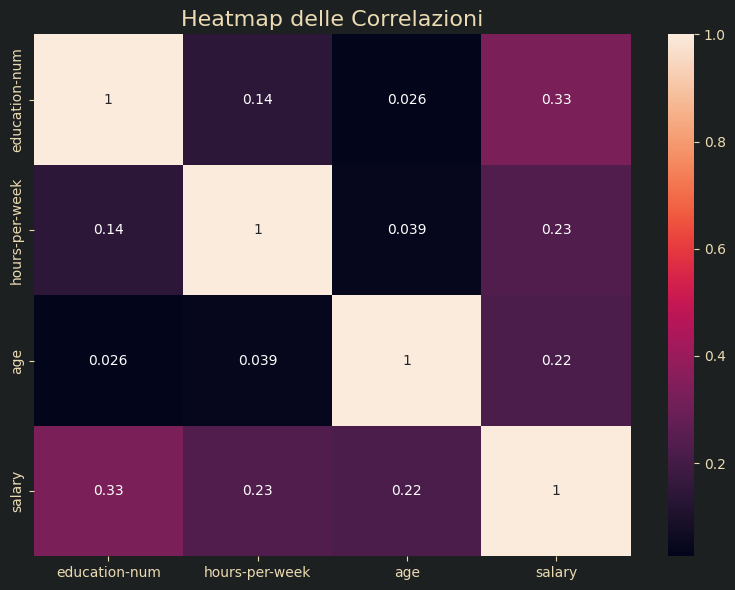

In [28]:
heat_df = x[['education-num','hours-per-week','age']].copy()
heat_df['salary'] = y

corr = heat_df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True)
plt.title("Heatmap delle Correlazioni", fontsize=16)
plt.tight_layout() 
plt.show()

## Addestramento dei Modelli

Prima di addestrare i modelli prepariamoci dei metodi che ci permettano di analizzarli:

Due per mostrare dei grafici 

In [29]:
from sklearn.metrics import confusion_matrix
def matrice_confusione(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix',fontsize = 14, fontweight = 'bold')
    plt.ylabel('Vero')
    plt.xlabel('Predetto')

In [30]:
def grafico_scatole(risultati,alg):
    sns.barplot(risultati)

    plt.title("Prestazione "+alg, fontsize=14, fontweight='bold')
    plt.ylabel("Valore (%)")
    plt.xlabel("Metrica")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis='y', linestyle='--', alpha=0.4)

Uno che ci calcoli le statistiche in maniera dinamica

In [31]:
from sklearn.metrics import precision_recall_fscore_support
def statistiche(y_test, y_pred):
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred)
    metrics_df = pd.DataFrame({
        'Precision': np.ceil(precision*100),
        'Recall': np.ceil(recall*100),
        'F1-Score':np.ceil(f1*100),
    }, index=['Classe 0', 'Classe 1'])
    return metrics_df

E uno che unisca tutte le funzioni un uno

In [32]:
from IPython.display import display
def analizza(y_test,y_pred,alg):
    plt.figure(figsize=(18, 6)) 
    plt.subplot(1, 2, 1)
    matrice_confusione(y_test,y_pred)
    tmp = statistiche(y_test,y_pred)
    display(tmp)
    plt.subplot(1, 2, 2)
    grafico_scatole(tmp,alg)
    results[alg] = tmp
    plt.tight_layout()
    plt.show()

In [33]:
results = {}

### Decision Tree

Il primo algoritmo che useremo sarà il _Decision tree_, il più semplice e anche il primo studiato, importante è settare la flag *class_weight* come _balanced_ cosìcchè il problema della _class imbalance_ in __y__ sia mitigato, infatti questa flag va regolare il peso delle classi in modo tale che in relazione alla dimensione delle due il loro valore sia bilanciato 

In [48]:
from sklearn import tree

dec_tree = tree.DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier()

Adesso che il modello è stato addestrato andiamo a vedere come si comporta col _test set_

In [49]:
y_pred = dec_tree.predict(x_test)

,Precision,Recall,F1-Score
Classe 0,83.0,88.0,85.0
Classe 1,50.0,40.0,45.0


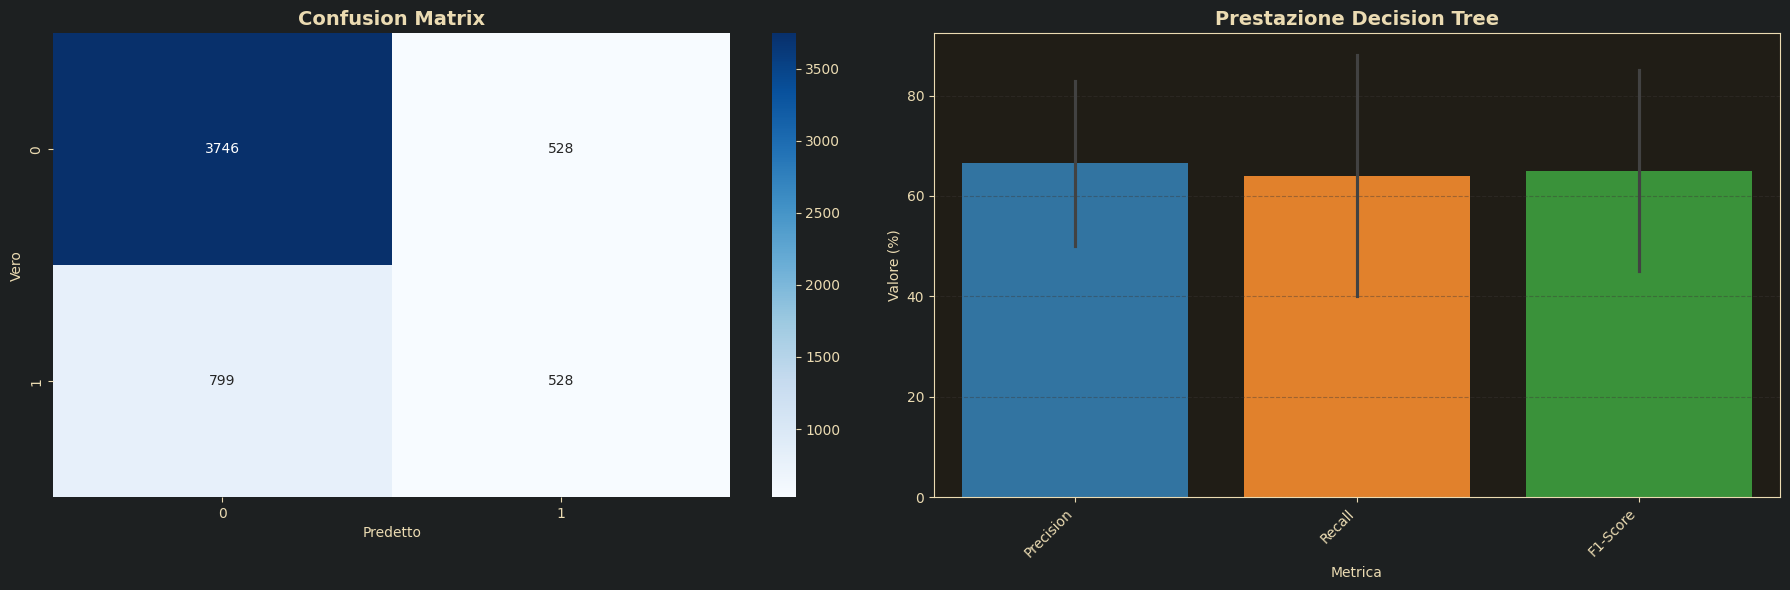

In [50]:
analizza(y_test,y_pred,"Decision Tree")

Non sono male come risultati, ma il classificatore tende a essere restio nel predire la _classe negativa_ e quindi per la _classe 0_ abbiamo una bassa *Precision*

### Support Vector Machine 
Ci muoviamo a questa famiglia di algoritmi, _sklearn_ ci fornisce 3 classi per la classificazione con SVM, useremo la versione LinearSVC (*Support Vector Classification*), è molto simile al classico SVC, ma è più veloce, usa come kernel lineare ed è implementato con una libreria più flessibile. 

In [1]:
from sklearn import svm 
svm_clf = svm.LinearSVC(class_weight = "balanced")
svm_clf.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [38]:
y_pred = svm_clf.predict(x_test)

,Precision,Recall,F1-Score
Classe 0,91.0,74.0,82.0
Classe 1,47.0,76.0,58.0


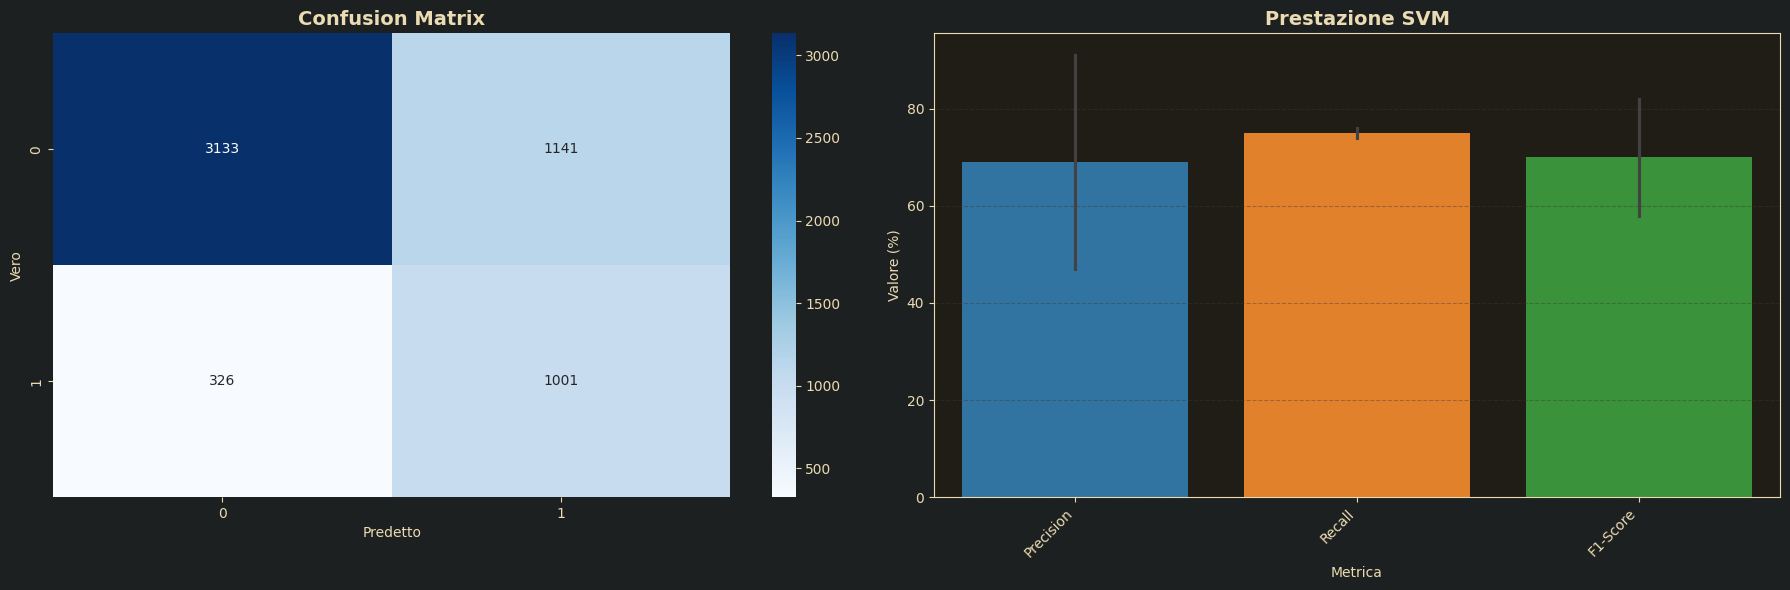

In [39]:
analizza(y_test,y_pred,"SVM")

SVM presenta degli ottimi valori, anche lui predice con poca precisione la *classe 0*, però meglio di Decision Tree

### Nearest Neighbor
L'ultimo algoritmo che useremo, il valore di _k_ utilizzato sarà 9, questo perché scendendo con i valori il modello il modello perdeva di precision, salendo invece diventava troppo sensibile al *rumore*

In [40]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [41]:
y_pred = neigh.predict(x_test)

,Precision,Recall,F1-Score
Classe 0,85.0,90.0,87.0
Classe 1,57.0,46.0,51.0


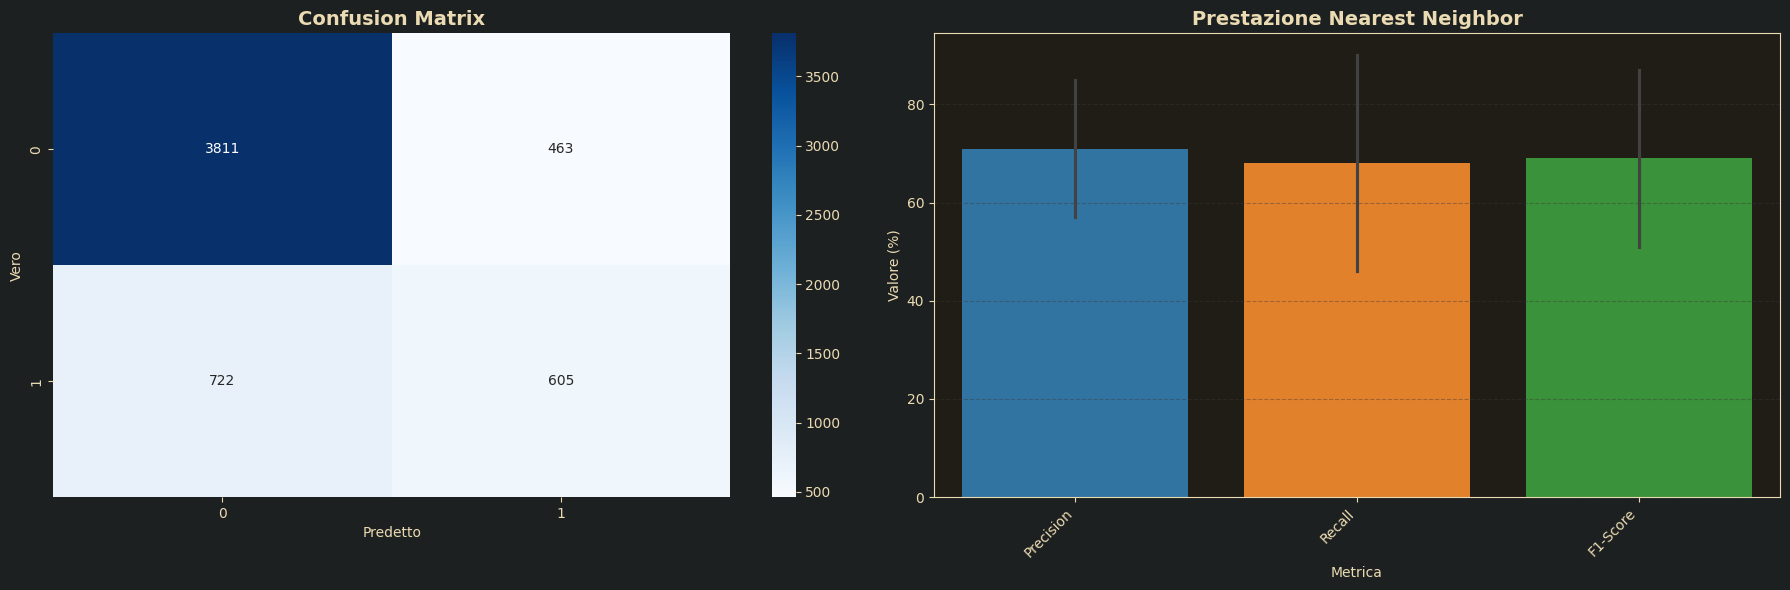

In [42]:
analizza(y_test,y_pred,"Nearest Neighbor")

KNN invece guadagna di *Precision*, ma perde di *Recall*, capiamo quindi che molti meno dei reali record $\ge$ 50k sono individuati  

## Risultati Finali

Per prima cosa visualizziamo le statistiche in modo tabulare,

In [43]:
for k in results.keys():
    print(k)
    display(results.get(k))

Decision Tree


,Precision,Recall,F1-Score
Classe 0,92.0,73.0,81.0
Classe 1,47.0,79.0,59.0


SVM


,Precision,Recall,F1-Score
Classe 0,91.0,74.0,82.0
Classe 1,47.0,76.0,58.0


Nearest Neighbor


,Precision,Recall,F1-Score
Classe 0,85.0,90.0,87.0
Classe 1,57.0,46.0,51.0


E poi in un comodo _boxplot_

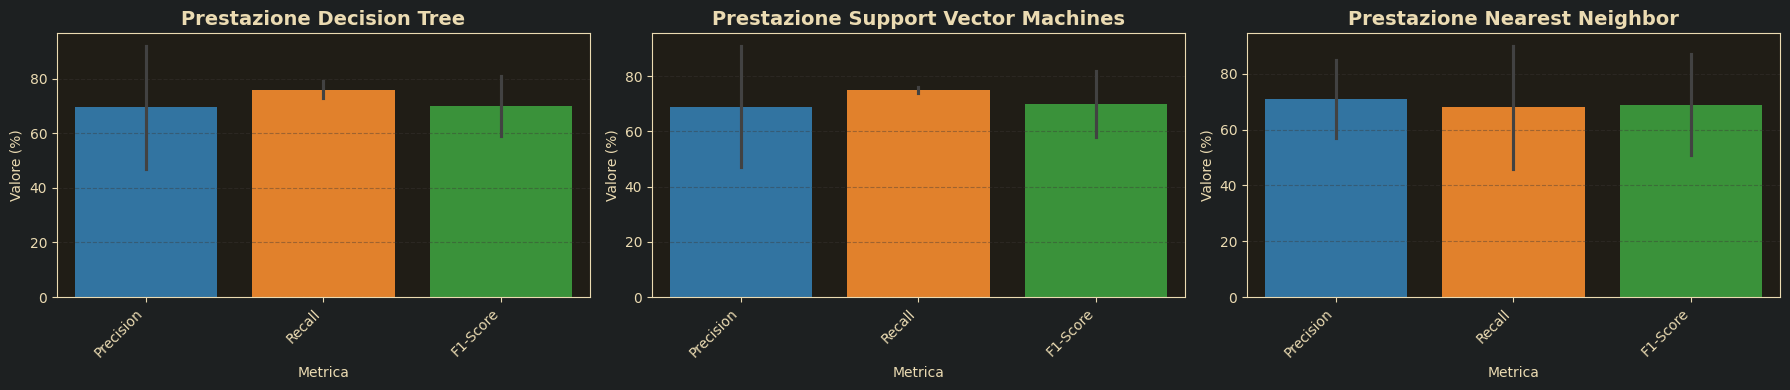

In [44]:
plt.figure(figsize=(18,4))
plt.subplot(1,3, 1)
grafico_scatole(results["Decision Tree"],"Decision Tree")
plt.subplot(1,3,2)
grafico_scatole(results["SVM"],"Support Vector Machines")
plt.subplot(1,3,3)
grafico_scatole(results["Nearest Neighbor"],"Nearest Neighbor")

plt.tight_layout()
plt.show()